In [16]:
import laspy 
import numpy as np
import os
from sklearn.neighbors import KDTree

file_path_5p = r"C:\Users\telukkari\Documents\Data\nls_5p_roof_top2_half.las"
file_path_20p = r"C:\Users\telukkari\Documents\Data\nls20p_roof_top2_half.laz"

buffer_of_median_z_diff = []
buffer_of_mean_z_diff = []
buffer_of_z_diff = []
middle_points = []


points_5p = laspy.read(file_path_5p)
points_20p = laspy.read(file_path_20p)

xyz_5p = np.vstack((points_5p.x, points_5p.y, points_5p.z)).T
xyz_20p = np.vstack((points_20p.x, points_20p.y, points_20p.z)).T

xyz_5p = np.vstack((points_5p.x, points_5p.y, points_5p.z)).T

xyz_20p = np.vstack((points_20p.x, points_20p.y, points_20p.z)).T


tree = KDTree(xyz_20p)
dist, idx = tree.query(xyz_5p, k=1)

z_diff =  xyz_20p[idx.flatten(), 2] - xyz_5p[:, 2]


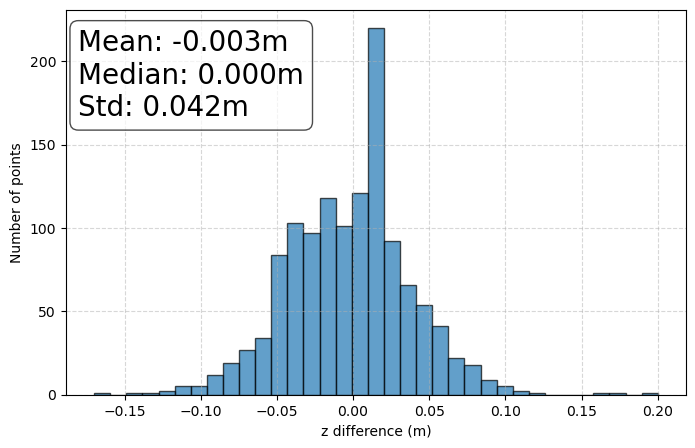

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming z_diff is already computed
mean_val = np.mean(z_diff)
median_val = np.median(z_diff)
std_val = np.std(z_diff)

plt.figure(figsize=(8, 5))
plt.hist(z_diff, bins=35, edgecolor='black', alpha=0.7)

# Add statistics text in the top-left corner
stats_text = f"Mean: {mean_val:.3f}m\nMedian: {median_val:.3f}m\nStd: {std_val:.3f}m"
plt.text(
    0.02, 0.95, stats_text,
    transform=plt.gca().transAxes,  # position relative to axes
    fontsize=20,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.xlabel("z difference (m)")
plt.ylabel("Number of points")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
